In [29]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
voronoi = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_stats.h5ad')

stardist = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_stardist_binning_stats.h5ad')

In [31]:
folder = '../data/xenium/outs/'

# Read the data
adata = sc.read_10x_h5(folder + 'cell_feature_matrix.h5')

# Load the cell type annotations
cell_type_df = pd.read_csv(folder + 'insitu_replicate_1_annotation.csv', index_col=0)

# Ensure index consistency and add 'cell_type' to adata
cell_type_df.index = cell_type_df.index.astype(str)
adata.obs['cell_type'] = cell_type_df['Cluster']

# Load additional metadata and add centroid coordinates to adata
cell_meta_df = pd.read_csv(folder + 'cells.csv', index_col=0)
cell_meta_df.index = cell_meta_df.index.astype(str)
adata.obs[['x_centroid', 'y_centroid']] = cell_meta_df[['x_centroid', 'y_centroid']]
adata.obs['cell_id'] = cell_meta_df.index

# Filter out unlabeled cells
adata = adata[adata.obs['cell_type'] != 'Unlabeled']

In [32]:
adata

View of AnnData object with n_obs × n_vars = 159226 × 313
    obs: 'cell_type', 'x_centroid', 'y_centroid', 'cell_id'
    var: 'gene_ids', 'feature_types', 'genome'

In [33]:
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(float)
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(int)


stardist.obs['cell_id'] = stardist.obs['cell_id'].astype(float)
stardist.obs['cell_id'] = stardist.obs['cell_id'].astype(int)

In [34]:
voronoi_obs_df = voronoi.obs
voronoi_df = voronoi_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
voronoi_df = voronoi_df.drop_duplicates(subset='cell_id')

stardist_obs_df = stardist.obs
stardist_df = stardist_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
stardist_df = stardist_df.drop_duplicates(subset='cell_id')

In [35]:
voronoi_df

,cell_id,CellType,realCellType
0,142883,Endothelial,Stromal
1,141638,DCIS_2,DCIS_2
2,133378,Stromal,Stromal
3,141054,DCIS_2,DCIS_2
4,141241,Stromal,Stromal
...,...,...,...
107801,141635,DCIS_2,DCIS_2
107802,141055,DCIS_2,Myoepi_KRT15+
107803,134602,Stromal,Stromal
107804,145875,DCIS_2,DCIS_2


In [36]:
stardist_df

,cell_id,CellType,realCellType
0,128986,DCIS_2,DCIS_2
1,144585,Endothelial,Endothelial
2,140484,DCIS_2,DCIS_2
3,131974,Macrophages_2,Macrophages_2
4,145665,T_Cell_&_Tumor_Hybrid,Stromal
...,...,...,...
83942,142942,Myoepi_ACTA2+,Myoepi_ACTA2+
83943,131200,Stromal,Stromal
83944,140498,DCIS_2,DCIS_2
83945,143461,DCIS_2,DCIS_2


In [37]:
# Convert 'cell_id' in adata to string (if needed)
adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)

/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_64290/1795972567.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)


In [38]:
merged_df = adata.obs.merge(voronoi_df, on='cell_id', how='left')



In [39]:
merged_df = merged_df.rename(columns={
    'CellType': 'voronoi_cell_type',
    'realCellType': 'voronoi_cell_type_real'
})
merged_df

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN
...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1


In [40]:
merged_df2 = merged_df.merge(stardist_df, on='cell_id', how='left')

In [41]:
merged_df2 = merged_df2.rename(columns={
    'CellType': 'stardist_cell_type',
    'realCellType': 'stardist_cell_type_real'
})
merged_df2

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1
...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN


In [42]:
adata.obs = merged_df2

In [43]:
adata.obs

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1
...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN


In [51]:
adata.obs['voronoi_cell_type'] = adata.obs['voronoi_cell_type'].replace('NA', 'not_selected')

In [52]:
adata.obs['stardist_cell_type'] = adata.obs['stardist_cell_type'].replace('NA', 'not_selected')

In [46]:
# Normalize and log-transform the data
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)
sc.pp.log1p(adata)

# Perform PCA, neighborhood graph, and UMAP
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [49]:

# Filter the AnnData object to keep only the rows where 'voronoi_cell_type' is 'not_selected'
filtered_adata = adata[adata.obs['stardist_cell_type'].notna()]


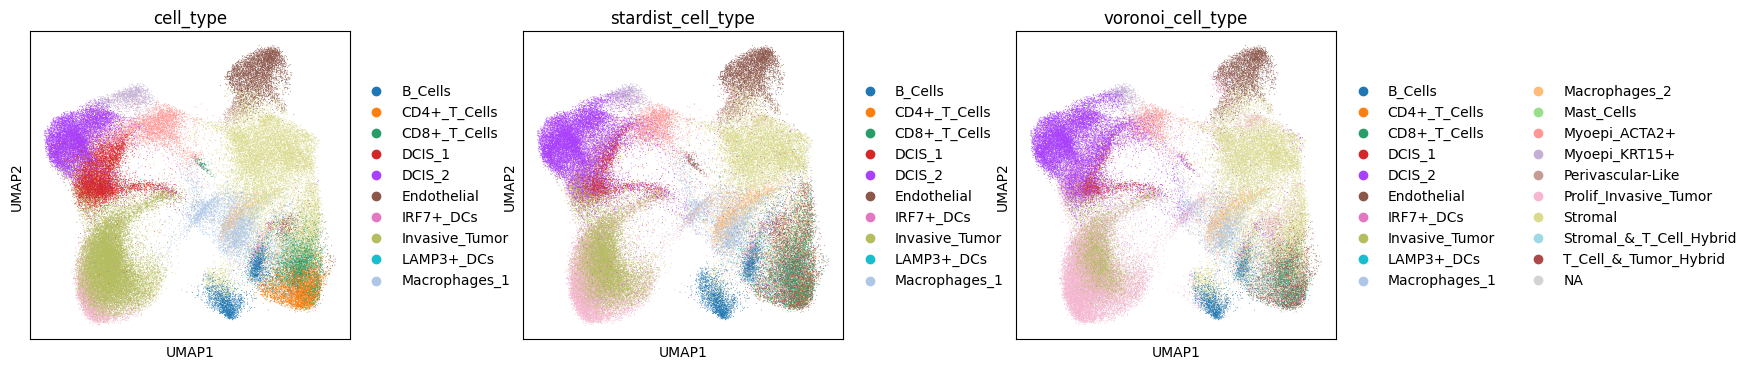

In [50]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(filtered_adata, color=["cell_type", 'stardist_cell_type', 'voronoi_cell_type'], wspace=0.4)

In [58]:
filtered_adata = adata[adata.obs['stardist_cell_type'] == 'DCIS_1']


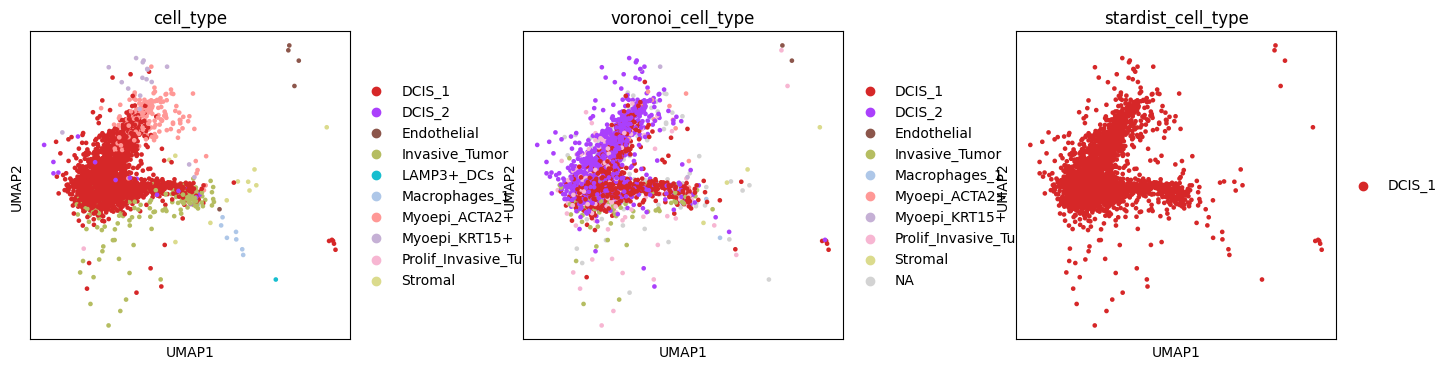

In [59]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(filtered_adata, color=["cell_type", 'voronoi_cell_type', 'stardist_cell_type'], wspace=0.4)

In [61]:
filtered_adata = adata[adata.obs['stardist_cell_type'].notna()]

In [63]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['stardist_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5062893011503468


In [64]:
filtered_adata = adata[adata.obs['voronoi_cell_type'].notna()]

In [65]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['voronoi_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5155383861317844
